# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [17]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

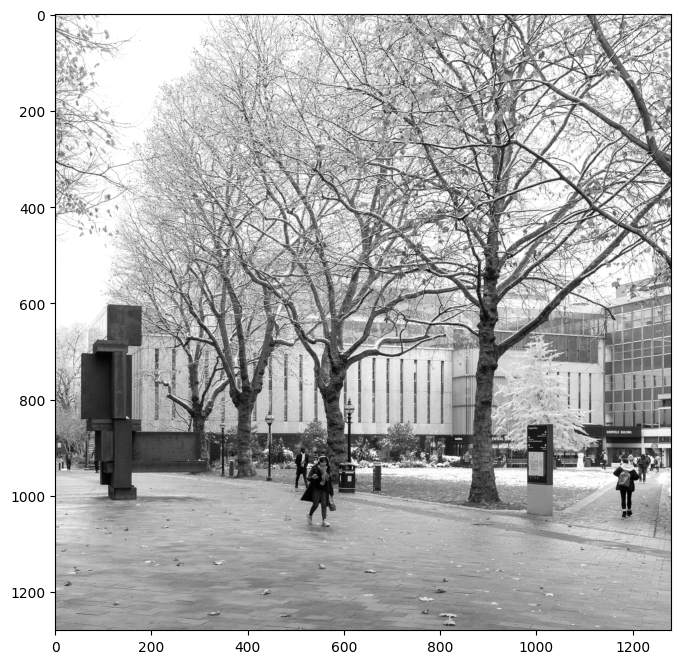

In [18]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

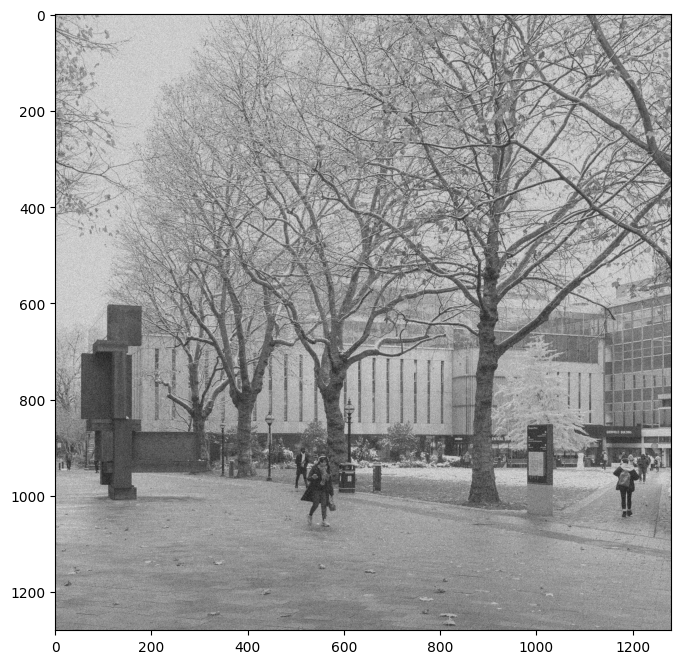

In [19]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


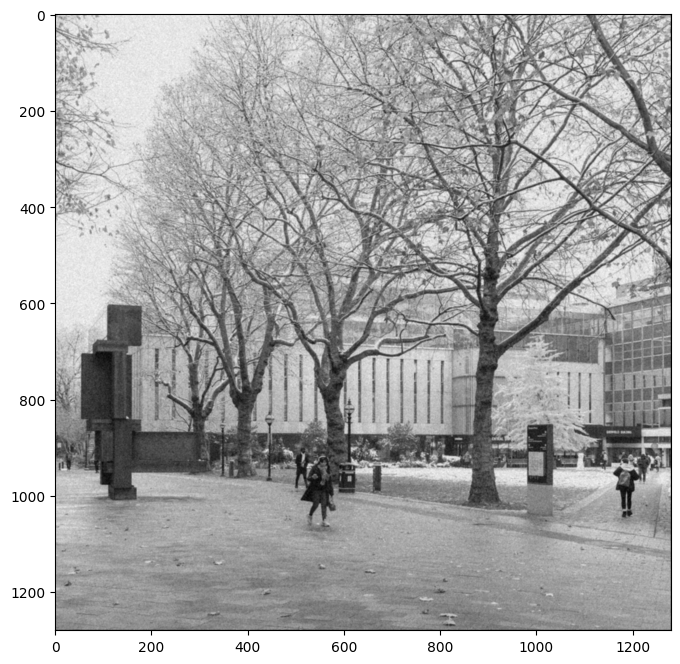

In [20]:
# Design the filter h
### Insert your code ###
h = np.array([[1/9,1/9,1/9],
              [1/9,1/9,1/9],
              [1/9,1/9,1/9]])

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

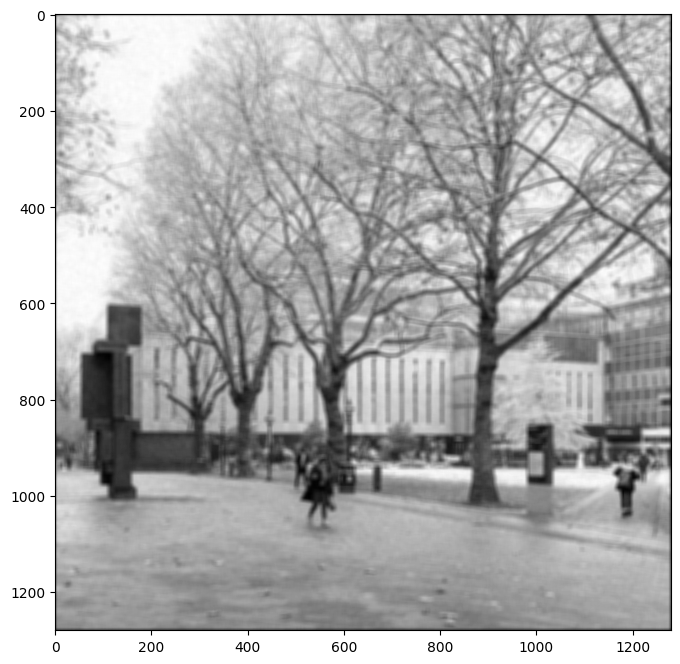

In [21]:
# Design the filter h
### Insert your code ###
h = np.full((11, 11), 1/121)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

Observed from 1.1 and 1.2 both filters remove noise from the image. Howebver, the image from 1.2 using 11x11 filter is more blurry than the image from 1.1 using 3x3. Therefore, increasing the kernel size makes the image more blurry.

## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


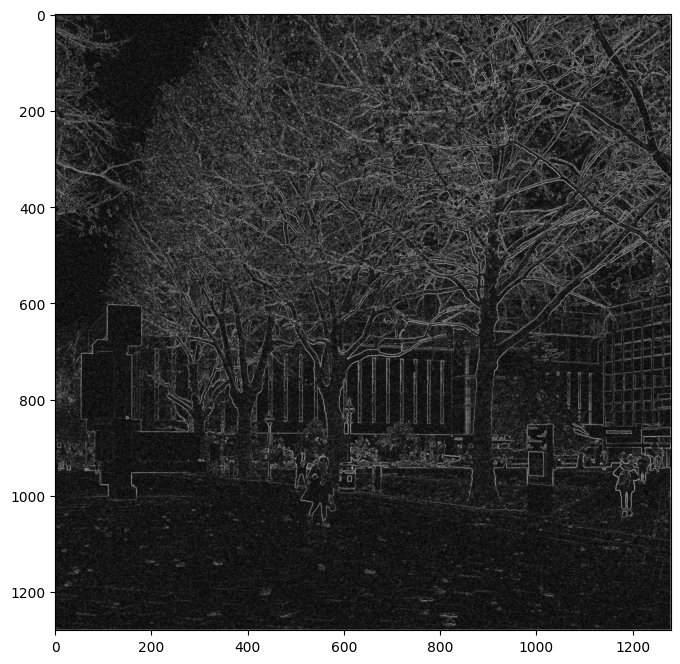

In [22]:
# Design the filters
### Insert your code ###
sobel_x = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]])
sobel_y = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

# Image filtering
### Insert your code ###
sx = scipy.signal.convolve2d(image_noisy, sobel_x, mode='same')
sy = scipy.signal.convolve2d(image_noisy, sobel_y, mode='same')

# Calculate the gradient magnitude
### Insert your code ###
grad_mag = np.sqrt(np.square(sx)+np.square(sy))

# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

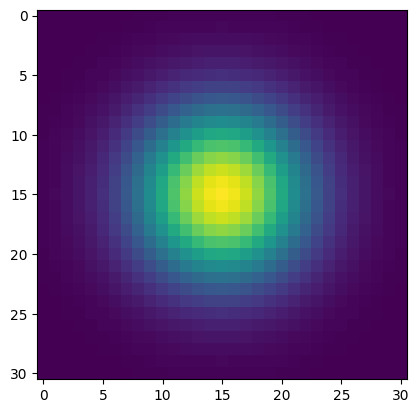

In [23]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    
    ### Insert your code ###
    # k = 3. kernel size = [-ksigma, ksigma]
    kernel_size = 3 * sigma * 2 + 1 
    x, y = np.mgrid[0 - (kernel_size // 2):kernel_size - (kernel_size // 2), 0 - (kernel_size // 2):kernel_size - (kernel_size // 2)]
    h = 1/(2 * math.pi * (sigma**2)) * np.exp(-(np.square(x) + np.square(y)) / (2 * (sigma**2)))
    return h

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

Computational time for Gaussian smoothing is: 1.7017524242401123


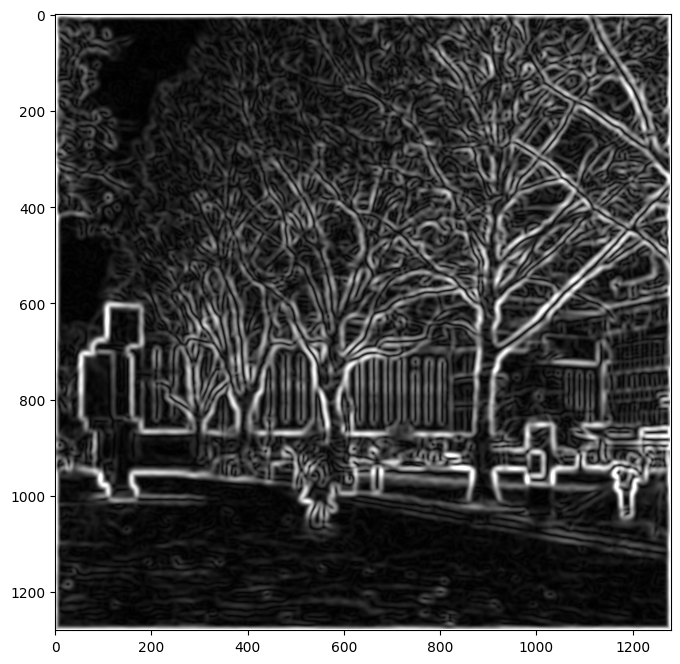

In [24]:
# Construct the Gaussian filter
### Insert your code ###
gaussian_filter = gaussian_filter_2d(5)

# Perform Gaussian smoothing and count time
### Insert your code ###
start = time.time()
gaussian_smoothed = scipy.signal.convolve2d(image_noisy, gaussian_filter, mode='same')
end = time.time()
compute_time = end - start
print("Computational time for Gaussian smoothing is:", compute_time)

# Image filtering
### Insert your code ###
sx = scipy.signal.convolve2d(gaussian_smoothed, sobel_x, mode='same')
sy = scipy.signal.convolve2d(gaussian_smoothed, sobel_y, mode='same')

# Calculate the gradient magnitude
### Insert your code ###
grad_mag = np.sqrt(np.square(sx)+np.square(sy))

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

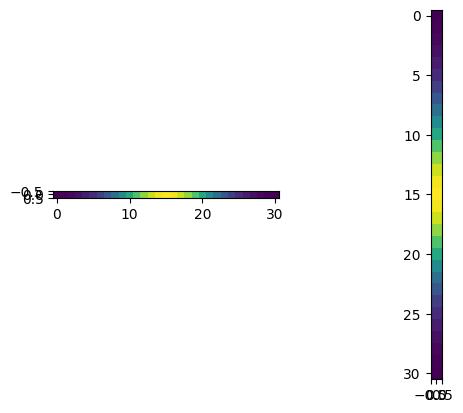

In [25]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    ### Insert your code ###
    # k = 3
    kernel_size = 3 * sigma * 2 + 1 
    x = np.arange(-(kernel_size // 2), kernel_size // 2 + 1)
    h = 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-(np.square(x)) / (2 * sigma**2))
    return h

# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
### Insert your code ###
h_x = np.expand_dims(gaussian_filter_1d(sigma), axis=0)

# # The Gaussian filter along y-axis. Its shape is (sz, 1).
# ### Insert your code ###
h_y = np.expand_dims(gaussian_filter_1d(sigma), axis=1)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

The computational time for two separable gaussian filters is: 0.21216249465942383
grad_mag 305.72220262228893
grad_mag2 305.72220262228893
the mean difference between the two magnitude maps is: 4.253962407896419e-13


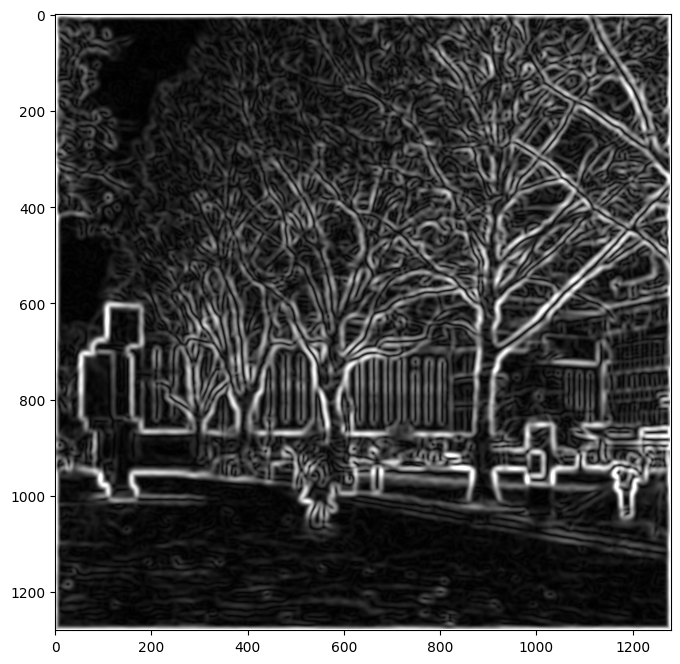

In [26]:
# Perform separable Gaussian smoothing and count time
### Insert your code ###
start = time.time()
gaussian_separable = scipy.signal.convolve2d(scipy.signal.convolve2d(image_noisy, h_x, mode='same'), h_y, mode='same')
end = time.time()
compute_time = end - start
print("The computational time for two separable gaussian filters is:", compute_time)

# Image filtering
### Insert your code ###
sx = scipy.signal.convolve2d(gaussian_separable, sobel_x, mode='same')
sy = scipy.signal.convolve2d(gaussian_separable, sobel_y, mode='same')

# Calculate the gradient magnitude
### Insert your code ###
grad_mag2 = np.sqrt(np.square(sx)+np.square(sy))

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
### Insert your code ###
# demonstrate the difference between two individual pixels
print("grad_mag", grad_mag[0,1]) 
print("grad_mag2", grad_mag2[0,1])

#calculate the mean difference
sum = 0
for i in range(len(grad_mag2)):
    for j in range(len(grad_mag2)):
        diff = abs(grad_mag2[i, j] - grad_mag[i, j])
        sum += diff
mean_diff = sum / (len(grad_mag2) ** 2)
print("the mean difference between the two magnitude maps is:", mean_diff)

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time.

The magnitude map produced by one gaussian filter and the separated filters are the same with mean difference 4.253962407896419e-13 which is relatively insignigicant. This is because applying one filter to the image is equavalent to applying its two separable filters. Furthermore, the computational time for one gaussian filter is 1.7017524242401123 and the time for the two separable filters is much samller which is 0.21216249465942383. This is because the computational compelxity associated with applying one gaussian filter is O(N^2K^2) where NxN is the image size and KxK is the kernel size. However for the two separable filters, the computational complexity is O(N^2K) as the two kernels are of sizes 1xK and Kx1, so the computational time is smaller for the two separable filters.

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [27]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [28]:
# Expand the dimension of the numpy array
### Insert your code ###
image_expanded = np.expand_dims(image_noisy, axis=(0, 1))

# Convert to a Pytorch tensor using torch.from_numpy
### Insert your code ###
image_tensor = torch.from_numpy(image_expanded)

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

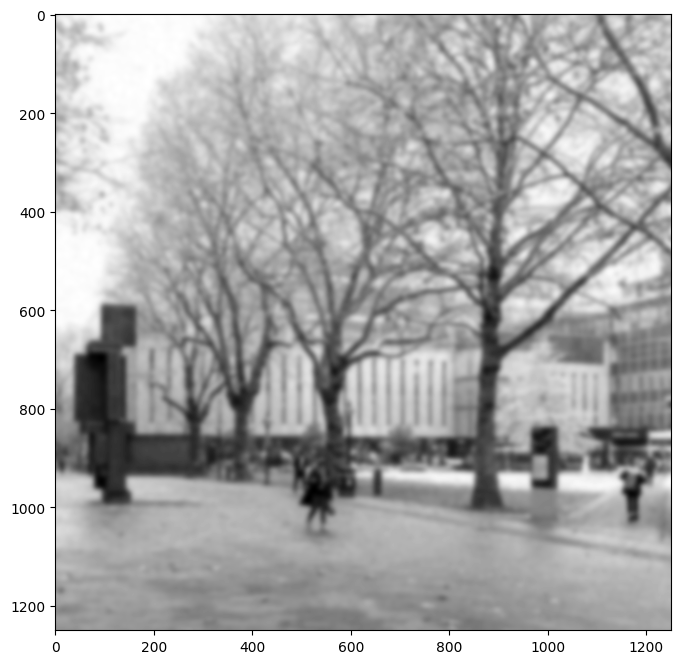

In [29]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)

# Create the Conv2D filter
### Insert your code ###
gaussian_expanded = np.expand_dims(h, axis=(0,1))   # expanded dimension
gaussian_tensor = torch.tensor(gaussian_expanded)   # convert to tensor
conv2d = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=15, bias=False)
with torch.no_grad():
    conv2d.weight.data = gaussian_tensor    #set Conv2d kernel to Gaussian filter

# Filtering
### Insert your code ###
image_smoothed = conv2d(image_tensor)
image_numpy = torch.Tensor.detach(image_smoothed)
image_filtered = np.squeeze(np.squeeze(image_numpy, axis=0), axis=0)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

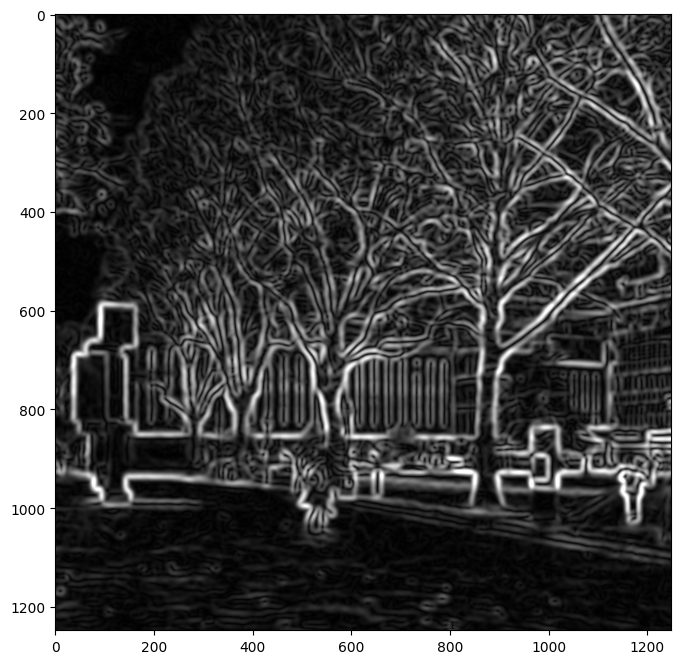

In [30]:
# Create Conv2D filters
### Insert your code ###
sx = np.array([[1,0,-1],
               [2,0,-2],
               [1,0,-1]])
sy = np.array([[1,2,1],
               [0,0,0],
               [-1,-2,-1]])

sx_expanded = np.expand_dims(sx, axis=(0,1))    #expanded dimension
sy_expanded = np.expand_dims(sy, axis=(0,1))
sx_tensor = torch.tensor(sx_expanded)   #convert to tensor
sy_tensor = torch.tensor(sy_expanded)

sx_tensor = sx_tensor.double()  #change data type
sy_tensor = sy_tensor.double()

sobel_x = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=15, bias=False)
with torch.no_grad():
    sobel_x.weight.data = sx_tensor
sobel_y = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=15, bias=False)
with torch.no_grad():
    sobel_y.weight.data = sy_tensor

# Perform filtering
### Insert your code ###
image_sx = sobel_x(image_smoothed)
image_sy = sobel_y(image_smoothed)
image_sx_numpy = torch.Tensor.detach(image_sx)  #convert to numpy
image_sy_numpy = torch.Tensor.detach(image_sy)
image_sx_2d = np.squeeze(np.squeeze(image_sx_numpy, axis=0), axis=0)    #downsize dimension
image_sy_2d = np.squeeze(np.squeeze(image_sy_numpy, axis=0), axis=0)

# Calculate the gradient magnitude map
### Insert your code ###
grad_mag3 = np.sqrt(np.square(image_sx_2d)+np.square(image_sy_2d))

# Visualise the gradient magnitude map (provided)
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)